In [2]:

df=pd.read_csv("breast-cancer.csv")

NameError: name 'pd' is not defined

Linear Kernel SVM Report:
[[ 60   3]
 [  2 106]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

RBF Kernel SVM Report:
[[ 55   8]
 [  3 105]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        63
           1       0.93      0.97      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Linear Kernel CV Accuracy: 0.9525850023288308
RBF Kernel CV Accuracy: 0.9402732494954199
Best Parameters from GridSearchCV: {'C': 1, 'gamma': 'scale'}


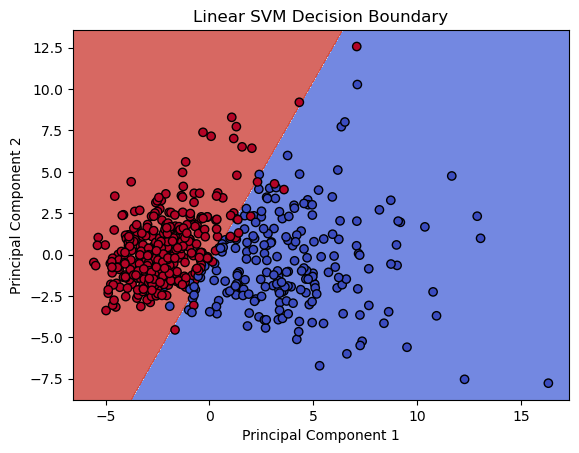

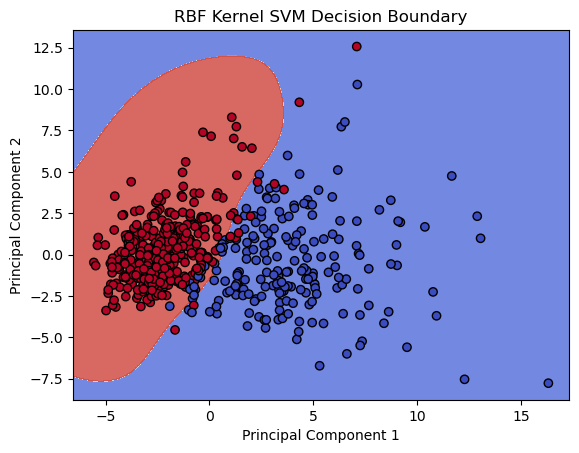

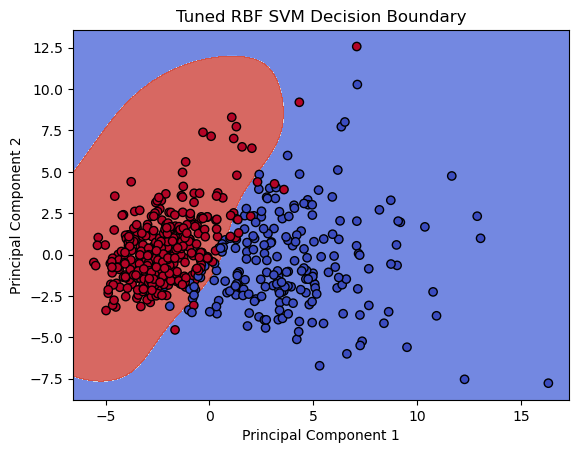

In [1]:
# Task 7 - Support Vector Machine (SVM) for Binary Classification

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load Dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: PCA for Visualization (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Step 4: Train Linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Step 5: Train RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Step 6: Evaluation
print("Linear Kernel SVM Report:")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

print("RBF Kernel SVM Report:")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# Step 7: Cross-validation
scores_linear = cross_val_score(svm_linear, X_pca, y, cv=5)
scores_rbf = cross_val_score(svm_rbf, X_pca, y, cv=5)
print("Linear Kernel CV Accuracy:", scores_linear.mean())
print("RBF Kernel CV Accuracy:", scores_rbf.mean())

# Step 8: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:", grid.best_params_)
best_svm = grid.best_estimator_

# Step 9: Plot Decision Boundary
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X_pca, y, "Linear SVM Decision Boundary")
plot_decision_boundary(svm_rbf, X_pca, y, "RBF Kernel SVM Decision Boundary")
plot_decision_boundary(best_svm, X_pca, y, "Tuned RBF SVM Decision Boundary")
